In [54]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
Calculates and compares various model performance metrics
'''

In [66]:
# load data

# cluster assignments from method + L1 logistic regression

# pca
pca = pd.read_csv('../data/clusters_pca.csv')

# scFoundation
scf = pd.read_csv('../data/clusters_embedding.csv')

# AI embeddings
embed = pd.read_csv('../data/clusters_embedding.csv')


In [64]:
# calculate scores

def score_method(m):
    accuracy = metrics.accuracy_score(m['y_pred'], m['y_test'])
    f1 = metrics.f1_score(m['y_pred'], m['y_test'])
    recall = metrics.recall_score(m['y_pred'], m['y_test'])
    precision = metrics.precision_score(m['y_pred'], m['y_test'])

    accuracies.append(accuracy)
    f1s.append(f1)
    recalls.append(recall)
    precisions.append(precision)

    return(accuracies, f1s, recalls, precisions)

In [67]:
# initiate variables

methods = [pca, scf, embed]
accuracies = []
f1s = []
recalls = []
precisions = []

for m in methods:
    score_method(m)

res = pd.DataFrame({'method' : ['pca', 'scFoundation', 'AI embedding'],
                    'accuracy': accuracies,
                    'f1': f1s,
                    'recall': recalls,
                    'precision': precisions})
res

,method,accuracy,f1,recall,precision
0,pca,0.742857,0.8,0.666667,1.000000
1,scFoundation,0.485714,0.5,0.529412,0.473684
2,AI embedding,0.485714,0.5,0.529412,0.473684


metric        accuracy   f1  precision    recall
method                                          
AI embedding  0.485714  0.5   0.473684  0.529412
pca           0.742857  0.8   1.000000  0.666667
scFoundation  0.485714  0.5   0.473684  0.529412


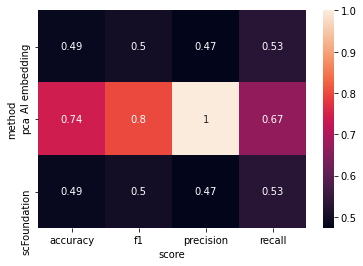

In [68]:
# plotting results

# format plot data
    
pl_data = pd.melt(res, id_vars = 'method', value_vars = ['accuracy', 'f1', 'recall', 'precision'], var_name = 'metric', value_name = 'score').pivot(index="method", columns="metric", values="score")
print(pl_data)

ax = sns.heatmap(pl_data, annot = True)
ax.set(xlabel = 'score', ylabel = 'method')

# export plot

plt.savefig('../figures/scores.png')
